# Imports

In [10]:
from base.systems import NHDWalls
from base.simulations import BoundarySimulation
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np

# Functions

# Main

In [5]:
def particle_density(sim:BoundarySimulation, strip_count = 10):
    strip_size = sim.system.box_size / strip_count
    strips = np.arange(strip_count) * strip_size
    strip_contribution = []
    for strip in strips:
        is_inside = (sim.system.positions[:,1] >= strip) * (sim.system.positions[:,1] < strip + strip_size)
        # velocitie_mod = np.abs(sim.system.velocities[is_inside,1])
        factor = np.sum(is_inside)
        strip_contribution.append(factor)
    sim.strip_density += strip_contribution

2025-07-14 12:53:04,511 - INFO - system created with 4 particles
2025-07-14 12:53:04,512 - INFO - Simulation enviorment with walls created.
2025-07-14 12:53:04,513 - INFO - running simulation from 0 to 2.0 in 0.5


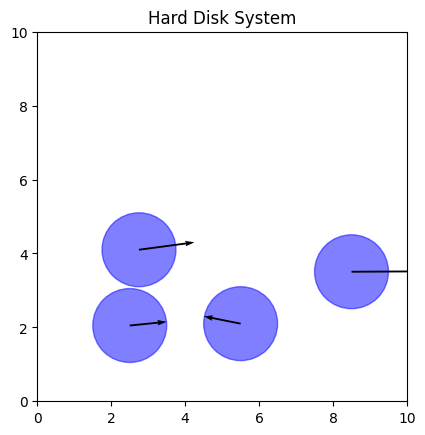

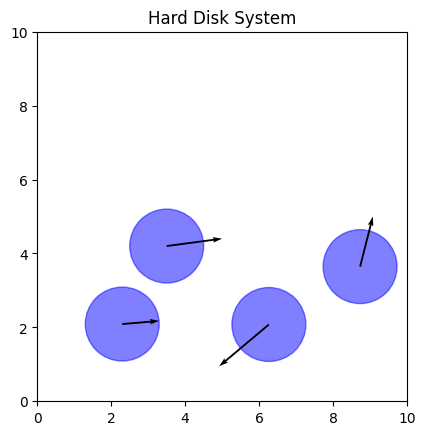

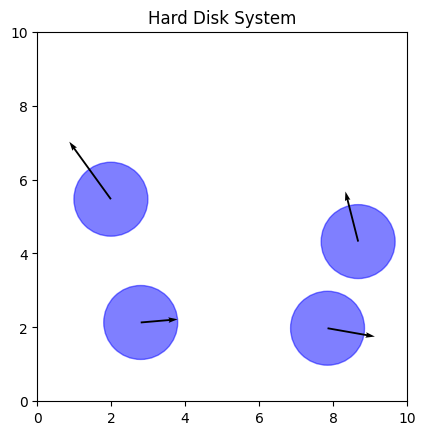

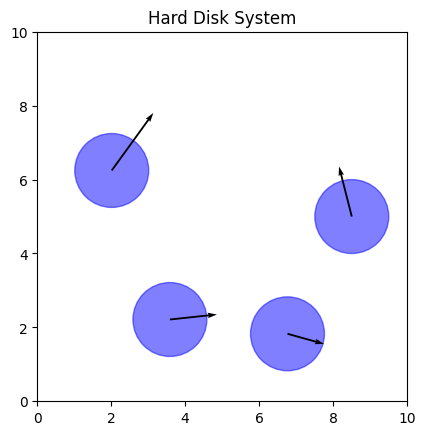

In [6]:
box_size=10
particle_positions=np.array([[2,2],[6,2],[7.5,3.5],[2,4]],dtype=float) #,[2,6]
particle_velocities=np.array([[1,0.2],[-1,0.2],[2,0.01],[1.5,0.1]], dtype=float)#,[-1.5,-0.1]
n_particles=particle_positions.shape[0]
particle_radius=1
# max_velocities=1
system_t = NHDWalls(box_size=box_size,particle_radius=particle_radius,n_particles=n_particles)
system_t.set_particle_parameters(particle_positions,particle_velocities)

sim = BoundarySimulation(deepcopy(system_t),dt=0.5)
sim.run(n_steps=4,fn=lambda x: sim.system.plot_system())

In [12]:
box_size = 10
dt = 0.5
n_steps = 1*1e3
strip_count = 500
strip_size = box_size / strip_count
n_particles_small = 4
n_particles_big = 64
overall_density = 0.18
sqr_r = (overall_density*box_size**2) / 3.1415

small_system = NHDWalls(box_size=box_size,particle_radius=np.sqrt(sqr_r/n_particles_small),n_particles=n_particles_small)
big_system = NHDWalls(box_size=box_size, particle_radius=np.sqrt(sqr_r/n_particles_big), n_particles=n_particles_big)

sim_small_system = BoundarySimulation(deepcopy(small_system),dt=dt)
sim_big_system = BoundarySimulation(deepcopy(big_system),dt=dt)

sim_small_system.strip_density = np.arange(strip_count) * 0.
sim_small_system.run(n_steps=n_steps,fn=lambda x: particle_density(x,strip_count=strip_count))
sim_small_system.strip_density /= (n_steps*strip_size)

sim_big_system.strip_density = np.arange(strip_count) * 0.
sim_big_system.run(n_steps=n_steps,fn=lambda x: particle_density(x,strip_count=strip_count))
sim_big_system.strip_density /= (n_steps*strip_size)


2025-07-14 13:10:31,283 - INFO - system created with 4 particles
2025-07-14 13:10:31,291 - INFO - system created with 64 particles
2025-07-14 13:10:31,292 - INFO - Simulation enviorment with walls created.
2025-07-14 13:10:31,293 - INFO - Simulation enviorment with walls created.
2025-07-14 13:10:31,293 - INFO - running simulation from 0 to 500.0 in 0.5


KeyboardInterrupt: 

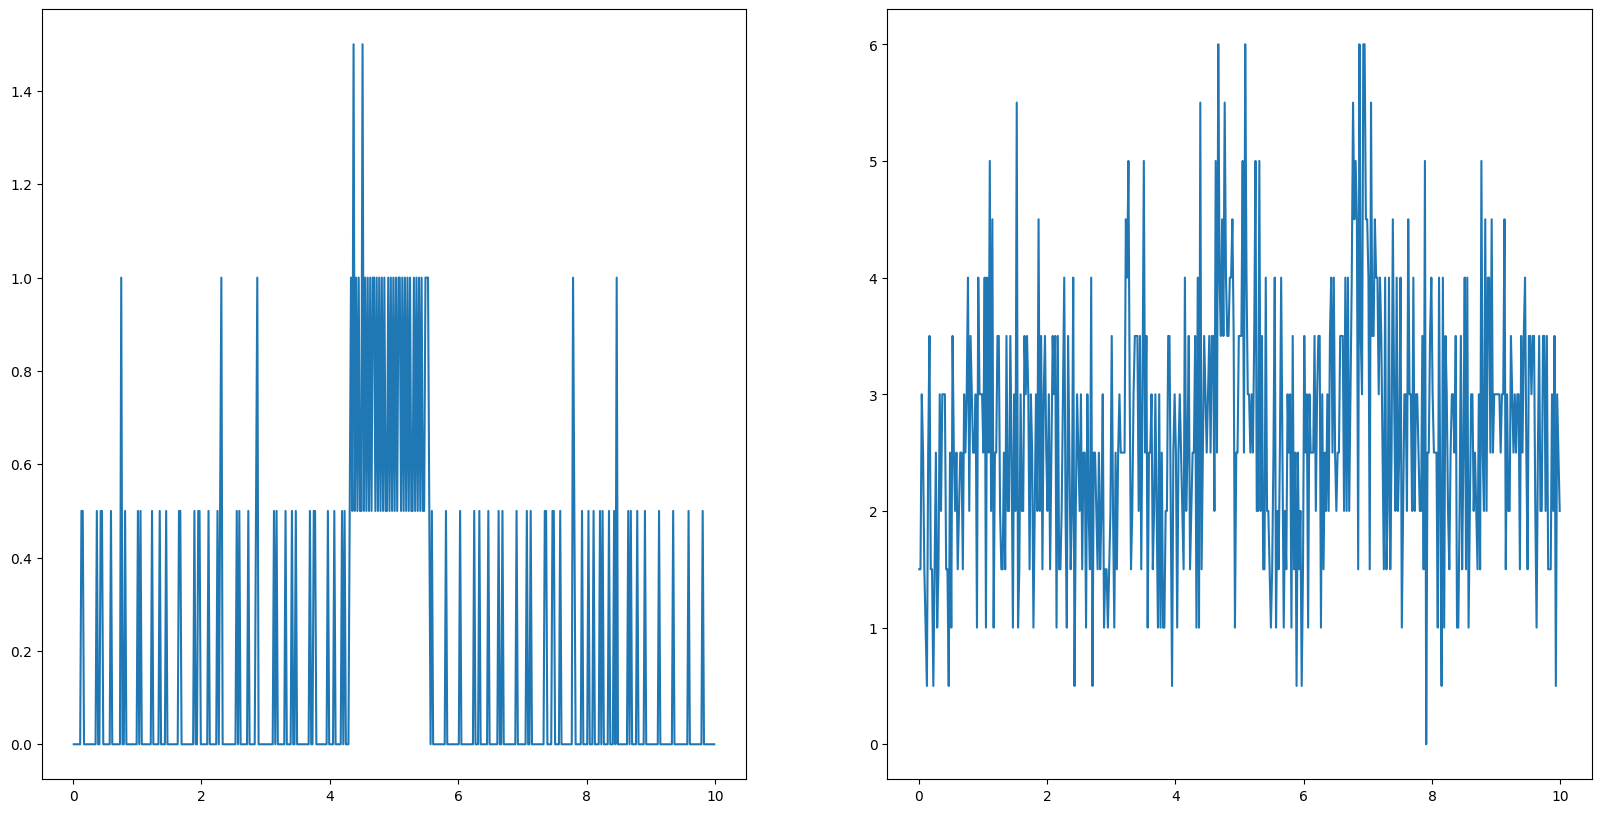

In [11]:
strip_centers = (np.arange(strip_count) * strip_size) + (strip_size / 2)
fig, axes = plt.subplots(1,2,figsize=(20,10))
axes[0].plot(strip_centers, sim_small_system.strip_density, linestyle='-')
axes[1].plot(strip_centers, sim_big_system.strip_density, linestyle='-')